In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from category_encoders import TargetEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# In this notebook i will try to do all of using OHE

In [ ]:
data = pd.read_csv("CP_OHE.csv")

In [ ]:
data.head()

In [5]:
dum = pd.get_dummies(data["Thal"],dtype=int,drop_first = True)


In [ ]:
dum.head()

In [7]:
data2 = data.drop("Thal",axis = 1)

In [8]:
data2.columns


Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'Target', 'CP_nonanginal', 'CP_nontypical',
       'CP_typical'],
      dtype='object')

In [9]:
data2 = pd.concat([data2,dum],axis=1)

In [10]:
data2.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target,CP_nonanginal,CP_nontypical,CP_typical,normal,reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,1,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,1,0,1,0


 - Now that i have the data2 with all numerical i will split it 

In [11]:
X = data2.drop("Target",axis=1)

In [12]:
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,CP_nonanginal,CP_nontypical,CP_typical,normal,reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,1,0,1,0


In [13]:
y = data2["Target"]

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((240, 16), (60, 16), (240,), (60,))

- scaling the data

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#  i made them commented couse some models wont need scaled data

In [17]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,CP_nonanginal,CP_nontypical,CP_typical,normal,reversable
232,54,0,160,201,0,0,163,0,0.0,1,1,1,0,0,1,0
59,51,1,125,213,0,2,125,1,1.4,1,1,0,0,1,1,0
6,62,0,140,268,0,2,160,0,3.6,3,2,0,0,0,1,0
185,66,1,160,246,0,0,120,1,0.0,2,3,0,1,0,0,0
173,57,1,152,274,0,0,88,1,1.2,2,1,0,0,0,0,1


## Logistic Regression 

In [18]:
LR_model = LogisticRegression(random_state=42, max_iter=1000)
LR_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
LR_model.score(X_train_scaled, y_train)

0.8583333333333333

In [20]:
LR_model.score(X_test_scaled, y_test)

0.8833333333333333

In [21]:
y_pred = LR_model.predict(X_test_scaled)

In [22]:
cm = confusion_matrix(y_test, y_pred)

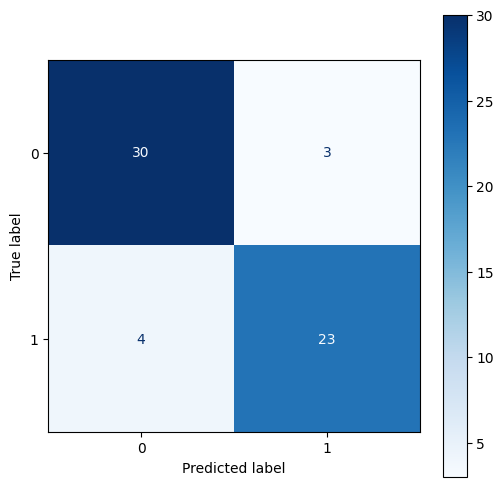

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')

In [29]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,CP_nonanginal,CP_nontypical,CP_typical,normal,reversable
232,54,0,160,201,0,0,163,0,0.0,1,1,1,0,0,1,0
59,51,1,125,213,0,2,125,1,1.4,1,1,0,0,1,1,0
6,62,0,140,268,0,2,160,0,3.6,3,2,0,0,0,1,0
185,66,1,160,246,0,0,120,1,0.0,2,3,0,1,0,0,0
173,57,1,152,274,0,0,88,1,1.2,2,1,0,0,0,0,1
